<a href="https://colab.research.google.com/github/t6nand/mloptimization/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial setup to enable usage of latex with matplotlib. Comment after first usage.

In [0]:
# ! sudo apt-get install texlive-latex-recommended #1
# ! sudo apt-get install dvipng texlive-fonts-recommended #2
# ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
# ! unzip type1cm.zip -d /tmp/type1cm #4
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
# ! sudo texhash #8

Import packages and plot formatting

In [0]:
# import relavant pacakages
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 7
plt.rcParams['lines.markersize'] = 4
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 150

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Gradient descent is an iterative algorithm for minimizing a differentiable function $f: {\rm I\!R^n \to \rm I\!R}$ on $\rm I\!R^n$. Starting from some initial point $x_o$ this algorithm iterates:
\begin{equation}
x^{k+1} = x^{k} - \alpha_{k} \nabla f(x^{k})
\end{equation}

Below is the function to run gradient descent algorithm as describes by above formulation.

In [0]:
# Function to perform gradient descent
def gradient_descent(X_0, step_size, grad, num_iter=100):
  x_temp = np.zeros((num_iter + 1, X_0.size)) # 1 additional to keep initial point
  x_temp[0, :] = X_0
  x = np.copy(X_0)
  for i in range(num_iter):
      x = x - step_size(i) * grad(x) 
      x_temp[i + 1, :] = x
  return x_temp

# Function to evaluate relative distance from the optimum
def off_from_optimum(x, b):
  dist = ((x - b)**2).sum(axis=1)
  return np.sqrt(dist) / np.linalg.norm(b)


Now for $x,b \in \rm I\!R^d$ and $f(x) = \|x - b\|_2$, and starting with $x^0 = 0$ and $b=[4.5, 6]$ for the choices of step sizes as defined in the below code block, number of iterations required to take algorithm to within $1\%$ of the optimal solution is approximated. In other words largest $k$ required to:
\begin{equation}
\frac{\|x^* - x^k\|_2}{\|x\|_2} \leq 0.01
\end{equation}
where, $x^*$ is minimizer of $f(x)$

Not that in this case:


1.   Gradient for $f(x)$ evaluated is:
\begin{equation}
\nabla_{x} f_x(x) = \frac{x-b}{\|x-b\|_2}
\end{equation}
2.   Recurrent relation is:
\begin{equation}
\|x^{k+1}-b\|_2 = |\|x^{k}-b\|_2 - \alpha_k|
\end{equation}



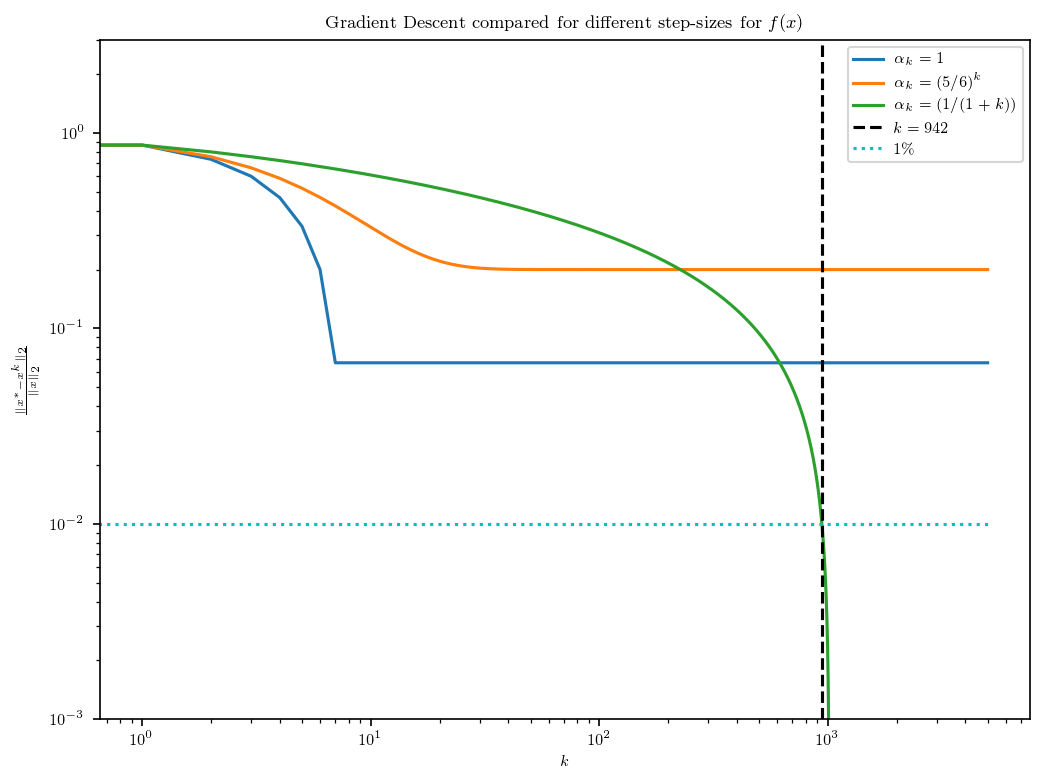

In [70]:
# Constants given in problem:
b = np.array([4.5, 6])
x_o = np.zeros(2)

# define 3 step size choices for f
alpha_f = OrderedDict([('1', lambda k: 1), ('(5/6)^k', lambda k: (5/6) ** k), 
                      ('(1/(1+k))', lambda k: 1/(1+k))])
# define gradient of f
nabla_f = lambda x: (x - b) / np.linalg.norm(x - b)

# Initialize expected number of iterations for the considered alphas as defined
# above.
f_expected_iter = [None, None, 942]

# Run gradient descent for f:
fig , ax = plt.subplots()
plt.ylim(10e-4, 3)
for idx, (specifier, alpha) in enumerate(alpha_f.items()):
  ax.loglog(off_from_optimum(gradient_descent(x_o, alpha, nabla_f, 5000), b) ,
            label=r'$\alpha_k=%s$' % specifier)
  if f_expected_iter[idx] is not None:
    ax.plot([f_expected_iter[idx]]*2, [10e-4, 3], '--k', label=r'$k=%d$' % f_expected_iter[idx])
ax.plot([0, 5000], [0.01, 0.01], ':c', label=r'$1\%$')
plt.title(r'Gradient Descent compared for different step-sizes for $f(x)$')
plt.xlabel('$k$')
plt.ylabel(r'$\frac{\|x^* - x^k\|_2}{\|x\|_2}$')
plt.legend()
plt.show()

Now for $x,b \in \rm I\!R^d$ and $g(x) = \|x - b\|_2^2$, and starting with $x^0 = 0$ and $b=[4.5, 6]$ for the following choices of step sizes, evaluate the number of iterations required to take algorithm to within $1\%$ of the optimal solution. 

1.   Gradient for $g(x)$ evaluated is:
\begin{equation}
\nabla_{x} g_x(x) = 2(x-b)
\end{equation}
2.   Recurrent relation is:
\begin{equation}
\|x^{k+1}-b\|_2 = |1-2\alpha_k| . \|x^{k} - b \|
\end{equation}

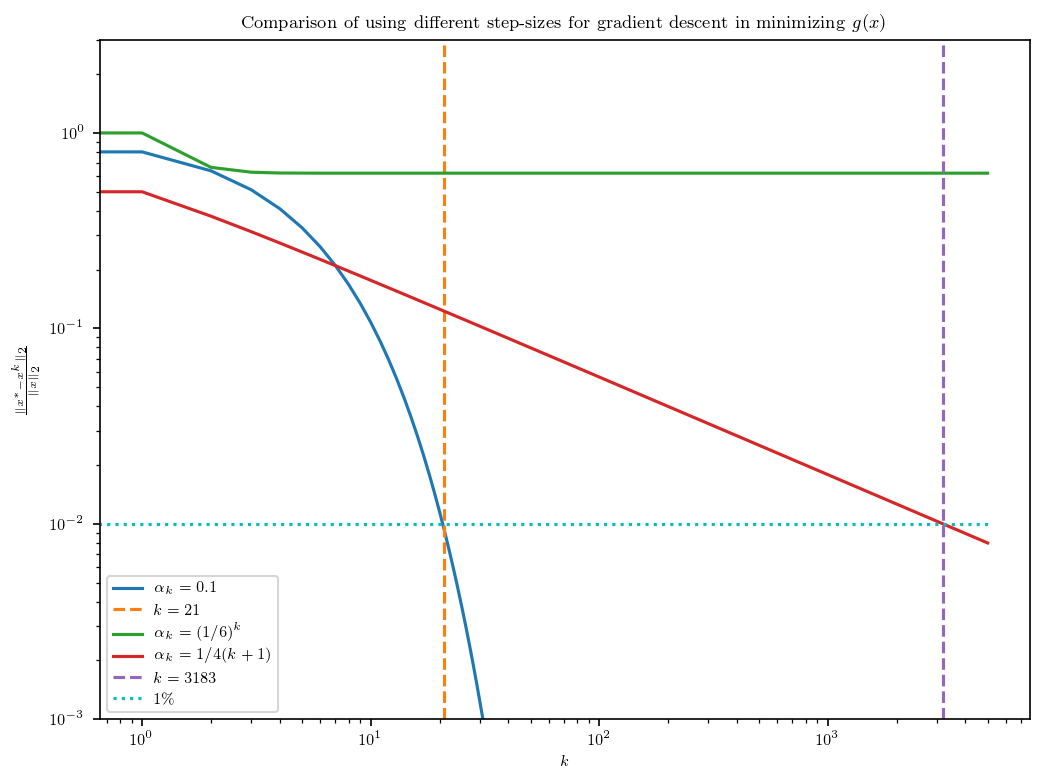

In [71]:
# Define step size choices for g
alpha_g = OrderedDict([('0.1', lambda k: 0.1), ('(1/6)^k', lambda k: (1/6) ** k)
                      , ('1/4(k+1)', lambda k: 1/(4*(k+1)))])
# define gradient of g
nabla_g = lambda x: 2 * (x - b)

# Define expected iterations for g as per theoretical formulation for the alphas
# as defined above.
g_expected_iter = [21, None, 3183]

# Run gradient descent for g:
fig1 , ax1 = plt.subplots()
plt.ylim(10e-4, 3)
for idx, (specifier, alpha) in enumerate(alpha_g.items()):
  ax1.loglog(off_from_optimum(gradient_descent(x_o, alpha, nabla_g, 5000), b) ,
            label=r'$\alpha_k=%s$' % specifier)
  if g_expected_iter[idx] is not None:
    ax1.plot([g_expected_iter[idx]]*2, [10e-4, 3], '--', label=r'$k=%d$' % g_expected_iter[idx])
ax1.plot([0, 5000], [0.01, 0.01], ':c', label=r'$1\%$')
plt.title(r'Comparison of using different step-sizes for gradient descent in minimizing $g(x)$')
plt.xlabel('$k$')
plt.ylabel(r'$\frac{\|x^* - x^k\|_2}{\|x\|_2}$')
plt.legend()
plt.show()